In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


In [33]:
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#     'motifs_legende/supervised/train/',
#     target_size=(224, 224),
#     #batch_size=8,
#     class_mode='categorical')

# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     'motifs_legende/supervised/test/',
#     target_size=(224, 224),
#     #batch_size=8,
#     class_mode='categorical')

# # Créer un tableau numpy pour les étiquettes de classe
# class_labels = list(test_generator.class_indices.keys())
# print(class_labels)
# class_indices = test_generator.class_indices
# num_classes = len(class_labels)



Found 108 images belonging to 21 classes.
Found 61 images belonging to 21 classes.
['anhydrite', 'calcareous_dolomite', 'chalk', 'chert', 'clay', 'coal_lignite', 'conglomerate', 'dolomite', 'dolomitic_limestone', 'fossiliferous', 'glauconite', 'gypsum', 'limestone', 'marl', 'metamorphic', 'pyrite', 'salt', 'sand', 'shale', 'silt', 'tuff']


In [ ]:
# Augmenter l'ensemble de données d'entraînement
train_datagen = ImageDataGenerator(rescale=1./255)
# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=20,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    'motifs_demo_classes/train/',
    target_size=(224, 224),
    #batch_size=8,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'motifs_demo_classes/test/',
    target_size=(224, 224),
    #batch_size=8,
    class_mode='categorical')


# Créer un tableau numpy pour les étiquettes de classe
class_labels = list(test_generator.class_indices.keys())
print(class_labels)
class_indices = test_generator.class_indices
num_classes = len(class_labels)



Found 22 images belonging to 5 classes.
Found 15 images belonging to 5 classes.
['coal_lignite', 'marl', 'marl_limestone', 'sand', 'sand_clay']


[codecarbon INFO @ 11:45:56] Energy consumed for RAM : 0.003606 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 11:45:56] Energy consumed for all CPUs : 0.015738 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 11:45:56] 0.019344 kWh of electricity used since the begining.
[codecarbon INFO @ 11:46:11] Energy consumed for RAM : 0.003618 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 11:46:11] Energy consumed for all CPUs : 0.015790 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 11:46:11] 0.019408 kWh of electricity used since the begining.
[codecarbon INFO @ 11:46:26] Energy consumed for RAM : 0.003630 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 11:46:26] Energy consumed for all CPUs : 0.015843 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 11:46:26] 0.019472 kWh of electricity used since the begining.


In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights="imagenet", include_top=False)

model = Sequential()
model.add(base_model)
#léger fine tuning
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
#on prédit 1 des 5 classes
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_resnet.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

#carbonboard --filepath="examples/emissions.csv" --port=3333



[codecarbon INFO @ 09:59:18] [setup] RAM Tracking...
[codecarbon INFO @ 09:59:18] [setup] GPU Tracking...
[codecarbon INFO @ 09:59:18] No GPU found.
[codecarbon INFO @ 09:59:18] [setup] CPU Tracking...
[codecarbon WARNING @ 09:59:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:59:21] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 09:59:21] >>> Tracker's metadata:
[codecarbon INFO @ 09:59:21]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 09:59:21]   Python version: 3.8.3
[codecarbon INFO @ 09:59:21]   Available RAM : 7.641 GB
[codecarbon INFO @ 09:59:21]   CPU count: 8
[codecarbon INFO @ 09:59:21]   CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 09:59:21]   GPU count: None
[codecarbon INFO @ 09:59:21]   GPU model: None


Epoch 1/10


[codecarbon INFO @ 09:59:36] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:59:36] Energy consumed for all CPUs : 0.000052 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:59:36] 0.000064 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.8852 - accuracy: 0.1364

[codecarbon INFO @ 09:59:51] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:59:51] Energy consumed for all CPUs : 0.000104 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:59:51] 0.000128 kWh of electricity used since the begining.



Epoch 1: saving model to model_resnet.h5
1/1 [==============================] - 32s 32s/step - loss: 1.8852 - accuracy: 0.1364 - val_loss: 1.6988 - val_accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.8636
Epoch 2: saving model to model_resnet.h5
1/1 [==============================] - 10s 10s/step - loss: 0.4335 - accuracy: 0.8636 - val_loss: 4.0690 - val_accuracy: 0.2000
Epoch 3/10


[codecarbon INFO @ 10:00:06] Energy consumed for RAM : 0.000036 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:00:06] Energy consumed for all CPUs : 0.000156 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:00:06] 0.000192 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.2007 - accuracy: 0.8182
Epoch 3: saving model to model_resnet.h5
1/1 [==============================] - 10s 10s/step - loss: 1.2007 - accuracy: 0.8182 - val_loss: 9.9949 - val_accuracy: 0.2000
Epoch 4/10


[codecarbon INFO @ 10:00:21] Energy consumed for RAM : 0.000048 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:00:21] Energy consumed for all CPUs : 0.000209 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:00:21] 0.000256 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.1723 - accuracy: 0.9545
Epoch 4: saving model to model_resnet.h5
1/1 [==============================] - 10s 10s/step - loss: 0.1723 - accuracy: 0.9545 - val_loss: 18.1047 - val_accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 5: saving model to model_resnet.h5
1/1 [==============================] - 12s 12s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 24.1352 - val_accuracy: 0.2000
Epoch 6/10


[codecarbon INFO @ 10:00:36] Energy consumed for RAM : 0.000060 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:00:36] Energy consumed for all CPUs : 0.000261 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:00:36] 0.000321 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.9545
Epoch 6: saving model to model_resnet.h5
1/1 [==============================] - 11s 11s/step - loss: 0.0974 - accuracy: 0.9545 - val_loss: 31.9155 - val_accuracy: 0.2000
Epoch 7/10


[codecarbon INFO @ 10:00:51] Energy consumed for RAM : 0.000072 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:00:51] Energy consumed for all CPUs : 0.000313 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:00:51] 0.000385 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 7: saving model to model_resnet.h5
1/1 [==============================] - 12s 12s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 42.9968 - val_accuracy: 0.2000
Epoch 8/10


[codecarbon INFO @ 10:01:06] Energy consumed for RAM : 0.000084 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:01:06] Energy consumed for all CPUs : 0.000365 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:01:06] 0.000449 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 8: saving model to model_resnet.h5
1/1 [==============================] - 13s 13s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 55.1976 - val_accuracy: 0.2000
Epoch 9/10
1/1 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000

[codecarbon INFO @ 10:01:21] Energy consumed for RAM : 0.000096 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:01:21] Energy consumed for all CPUs : 0.000417 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:01:21] 0.000513 kWh of electricity used since the begining.



Epoch 9: saving model to model_resnet.h5
1/1 [==============================] - 11s 11s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 65.1168 - val_accuracy: 0.2000
Epoch 10/10
1/1 [==============================] - ETA: 0s - loss: 7.9714e-04 - accuracy: 1.0000
Epoch 10: saving model to model_resnet.h5
1/1 [==============================] - 10s 10s/step - loss: 7.9714e-04 - accuracy: 1.0000 - val_loss: 76.2834 - val_accuracy: 0.2000


[codecarbon INFO @ 10:01:33] Energy consumed for RAM : 0.000105 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:01:33] Energy consumed for all CPUs : 0.000457 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:01:33] 0.000562 kWh of electricity used since the begining.


Emissions: 3.092100757710189e-05 kg


In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(weights="imagenet", include_top=False)

model = Sequential()
model.add(base_model)
#léger fine tuning
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_vgg.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

#carbonboard --filepath="examples/emissions.csv" --port=3333



[codecarbon INFO @ 09:51:46] [setup] RAM Tracking...
[codecarbon INFO @ 09:51:46] [setup] GPU Tracking...
[codecarbon INFO @ 09:51:46] No GPU found.
[codecarbon INFO @ 09:51:46] [setup] CPU Tracking...
[codecarbon WARNING @ 09:51:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:51:48] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 09:51:48] >>> Tracker's metadata:
[codecarbon INFO @ 09:51:48]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 09:51:48]   Python version: 3.8.3
[codecarbon INFO @ 09:51:48]   Available RAM : 7.641 GB
[codecarbon INFO @ 09:51:48]   CPU count: 8
[codecarbon INFO @ 09:51:48]   CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 09:51:48]   GPU count: None
[codecarbon INFO @ 09:51:48]   GPU model: None


Epoch 1/15


[codecarbon INFO @ 09:52:04] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:52:04] Energy consumed for all CPUs : 0.000052 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:52:04] 0.000064 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.6601 - accuracy: 0.2273
Epoch 1: saving model to model_vgg.h5
1/1 [==============================] - 22s 22s/step - loss: 1.6601 - accuracy: 0.2273 - val_loss: 5.4538 - val_accuracy: 0.2000
Epoch 2/15


[codecarbon INFO @ 09:52:19] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:52:19] Energy consumed for all CPUs : 0.000104 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:52:19] 0.000128 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 5.9403 - accuracy: 0.2727
Epoch 2: saving model to model_vgg.h5
1/1 [==============================] - 19s 19s/step - loss: 5.9403 - accuracy: 0.2727 - val_loss: 2.5424 - val_accuracy: 0.2000
Epoch 3/15


[codecarbon INFO @ 09:52:34] Energy consumed for RAM : 0.000036 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:52:34] Energy consumed for all CPUs : 0.000156 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:52:34] 0.000192 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 3.5946 - accuracy: 0.2273

[codecarbon INFO @ 09:52:49] Energy consumed for RAM : 0.000048 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:52:49] Energy consumed for all CPUs : 0.000209 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:52:49] 0.000256 kWh of electricity used since the begining.



Epoch 3: saving model to model_vgg.h5
1/1 [==============================] - 19s 19s/step - loss: 3.5946 - accuracy: 0.2273 - val_loss: 1.6826 - val_accuracy: 0.2000
Epoch 4/15


[codecarbon INFO @ 09:53:04] Energy consumed for RAM : 0.000060 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:53:04] Energy consumed for all CPUs : 0.000261 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:53:04] 0.000320 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.9953 - accuracy: 0.2273
Epoch 4: saving model to model_vgg.h5
1/1 [==============================] - 20s 20s/step - loss: 1.9953 - accuracy: 0.2273 - val_loss: 1.7064 - val_accuracy: 0.2000
Epoch 5/15


[codecarbon INFO @ 09:53:19] Energy consumed for RAM : 0.000072 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:53:19] Energy consumed for all CPUs : 0.000313 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:53:19] 0.000384 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.6818 - accuracy: 0.2273
Epoch 5: saving model to model_vgg.h5
1/1 [==============================] - 19s 19s/step - loss: 1.6818 - accuracy: 0.2273 - val_loss: 1.6058 - val_accuracy: 0.2000
Epoch 6/15


[codecarbon INFO @ 09:53:34] Energy consumed for RAM : 0.000084 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:53:34] Energy consumed for all CPUs : 0.000365 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:53:34] 0.000449 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.6062 - accuracy: 0.2273
Epoch 6: saving model to model_vgg.h5
1/1 [==============================] - 18s 18s/step - loss: 1.6062 - accuracy: 0.2273 - val_loss: 1.5975 - val_accuracy: 0.2000
Epoch 7/15


[codecarbon INFO @ 09:53:49] Energy consumed for RAM : 0.000096 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:53:49] Energy consumed for all CPUs : 0.000417 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:53:49] 0.000513 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5913 - accuracy: 0.1818

[codecarbon INFO @ 09:54:04] Energy consumed for RAM : 0.000108 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:54:04] Energy consumed for all CPUs : 0.000469 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:54:04] 0.000577 kWh of electricity used since the begining.



Epoch 7: saving model to model_vgg.h5
1/1 [==============================] - 19s 19s/step - loss: 1.5913 - accuracy: 0.1818 - val_loss: 1.5874 - val_accuracy: 0.4000
Epoch 8/15


[codecarbon INFO @ 09:54:19] Energy consumed for RAM : 0.000119 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:54:19] Energy consumed for all CPUs : 0.000521 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:54:19] 0.000641 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5948 - accuracy: 0.2727
Epoch 8: saving model to model_vgg.h5
1/1 [==============================] - 20s 20s/step - loss: 1.5948 - accuracy: 0.2727 - val_loss: 1.6159 - val_accuracy: 0.4000
Epoch 9/15


[codecarbon INFO @ 09:54:34] Energy consumed for RAM : 0.000131 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:54:34] Energy consumed for all CPUs : 0.000574 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:54:34] 0.000705 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.6114 - accuracy: 0.3182
Epoch 9: saving model to model_vgg.h5
1/1 [==============================] - 20s 20s/step - loss: 1.6114 - accuracy: 0.3182 - val_loss: 1.5853 - val_accuracy: 0.2000
Epoch 10/15


[codecarbon INFO @ 09:54:49] Energy consumed for RAM : 0.000143 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:54:49] Energy consumed for all CPUs : 0.000626 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:54:49] 0.000769 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5540 - accuracy: 0.2727
Epoch 10: saving model to model_vgg.h5


[codecarbon INFO @ 09:55:04] Energy consumed for RAM : 0.000155 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:55:04] Energy consumed for all CPUs : 0.000678 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:55:04] 0.000833 kWh of electricity used since the begining.


1/1 [==============================] - 19s 19s/step - loss: 1.5540 - accuracy: 0.2727 - val_loss: 1.5407 - val_accuracy: 0.2000
Epoch 11/15


[codecarbon INFO @ 09:55:19] Energy consumed for RAM : 0.000167 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:55:19] Energy consumed for all CPUs : 0.000730 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:55:19] 0.000897 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5468 - accuracy: 0.2727
Epoch 11: saving model to model_vgg.h5
1/1 [==============================] - 21s 21s/step - loss: 1.5468 - accuracy: 0.2727 - val_loss: 1.4983 - val_accuracy: 0.3333
Epoch 12/15


[codecarbon INFO @ 09:55:34] Energy consumed for RAM : 0.000179 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:55:34] Energy consumed for all CPUs : 0.000782 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:55:34] 0.000961 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5890 - accuracy: 0.3182
Epoch 12: saving model to model_vgg.h5
1/1 [==============================] - 21s 21s/step - loss: 1.5890 - accuracy: 0.3182 - val_loss: 1.4469 - val_accuracy: 0.4000
Epoch 13/15


[codecarbon INFO @ 09:55:49] Energy consumed for RAM : 0.000191 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:55:49] Energy consumed for all CPUs : 0.000834 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:55:49] 0.001025 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5865 - accuracy: 0.2273
Epoch 13: saving model to model_vgg.h5
1/1 [==============================] - 18s 18s/step - loss: 1.5865 - accuracy: 0.2273 - val_loss: 1.7045 - val_accuracy: 0.2000
Epoch 14/15


[codecarbon INFO @ 09:56:04] Energy consumed for RAM : 0.000203 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:56:04] Energy consumed for all CPUs : 0.000887 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:56:04] 0.001090 kWh of electricity used since the begining.
[codecarbon INFO @ 09:56:19] Energy consumed for RAM : 0.000215 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:56:19] Energy consumed for all CPUs : 0.000939 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:56:19] 0.001154 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.6837 - accuracy: 0.2273
Epoch 14: saving model to model_vgg.h5
1/1 [==============================] - 20s 20s/step - loss: 1.6837 - accuracy: 0.2273 - val_loss: 1.4395 - val_accuracy: 0.4000
Epoch 15/15


[codecarbon INFO @ 09:56:34] Energy consumed for RAM : 0.000227 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:56:34] Energy consumed for all CPUs : 0.000991 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:56:34] 0.001218 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5427 - accuracy: 0.2727
Epoch 15: saving model to model_vgg.h5
1/1 [==============================] - 19s 19s/step - loss: 1.5427 - accuracy: 0.2727 - val_loss: 1.4485 - val_accuracy: 0.3333


[codecarbon INFO @ 09:56:43] Energy consumed for RAM : 0.000234 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 09:56:43] Energy consumed for all CPUs : 0.001022 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 09:56:43] 0.001256 kWh of electricity used since the begining.


Emissions: 6.908894251829506e-05 kg


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights="imagenet", include_top=False)

model = Sequential()
model.add(base_model)
#léger fine tuning
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_inception_bin.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

#carbonboard --filepath="examples/emissions.csv" --port=3333


[codecarbon INFO @ 10:52:44] [setup] RAM Tracking...
[codecarbon INFO @ 10:52:44] [setup] GPU Tracking...
[codecarbon INFO @ 10:52:44] No GPU found.
[codecarbon INFO @ 10:52:44] [setup] CPU Tracking...
[codecarbon WARNING @ 10:52:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:52:47] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:52:47] >>> Tracker's metadata:
[codecarbon INFO @ 10:52:47]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 10:52:47]   Python version: 3.8.3
[codecarbon INFO @ 10:52:47]   Available RAM : 7.641 GB
[codecarbon INFO @ 10:52:47]   CPU count: 8
[codecarbon INFO @ 10:52:47]   CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:52:47]   GPU count: None
[codecarbon INFO @ 10:52:47]   GPU model: None


Epoch 1/10


[codecarbon INFO @ 10:52:54] Energy consumed for RAM : 0.001075 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:52:54] Energy consumed for all CPUs : 0.004694 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:52:54] 0.005769 kWh of electricity used since the begining.
[codecarbon INFO @ 10:53:03] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:03] Energy consumed for all CPUs : 0.000054 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:03] 0.000067 kWh of electricity used since the begining.
[codecarbon INFO @ 10:53:09] Energy consumed for RAM : 0.001087 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:09] Energy consumed for all CPUs : 0.004746 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:09] 0.005833 kWh of electricity used since the begining.
[codecarbon INFO @ 10:53:18] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:18] Energy consumed for all

1/1 [==============================] - ETA: 0s - loss: 1.7825 - accuracy: 0.1818
Epoch 1: saving model to model_inception_bin.h5


[codecarbon INFO @ 10:53:24] Energy consumed for RAM : 0.001099 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:24] Energy consumed for all CPUs : 0.004798 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:24] 0.005897 kWh of electricity used since the begining.


1/1 [==============================] - 38s 38s/step - loss: 1.7825 - accuracy: 0.1818 - val_loss: 1.9266 - val_accuracy: 0.3333
Epoch 2/10


[codecarbon INFO @ 10:53:33] Energy consumed for RAM : 0.000036 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:33] Energy consumed for all CPUs : 0.000158 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:33] 0.000194 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5104 - accuracy: 0.5455
Epoch 2: saving model to model_inception_bin.h5
1/1 [==============================] - 10s 10s/step - loss: 1.5104 - accuracy: 0.5455 - val_loss: 1.9891 - val_accuracy: 0.6667
Epoch 3/10


[codecarbon INFO @ 10:53:39] Energy consumed for RAM : 0.001111 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:39] Energy consumed for all CPUs : 0.004850 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:39] 0.005961 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9091
Epoch 3: saving model to model_inception_bin.h5
1/1 [==============================] - 8s 8s/step - loss: 0.2191 - accuracy: 0.9091 - val_loss: 5.3271 - val_accuracy: 0.2667
Epoch 4/10


[codecarbon INFO @ 10:53:48] Energy consumed for RAM : 0.000048 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:48] Energy consumed for all CPUs : 0.000210 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:48] 0.000258 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0887 - accuracy: 0.9545
Epoch 4: saving model to model_inception_bin.h5
1/1 [==============================] - 8s 8s/step - loss: 0.0887 - accuracy: 0.9545 - val_loss: 7.7868 - val_accuracy: 0.3333
Epoch 5/10


[codecarbon INFO @ 10:53:54] Energy consumed for RAM : 0.001123 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:53:54] Energy consumed for all CPUs : 0.004902 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:53:54] 0.006025 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 1.0000
Epoch 5: saving model to model_inception_bin.h5
1/1 [==============================] - 8s 8s/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 10.2018 - val_accuracy: 0.3333
Epoch 6/10


[codecarbon INFO @ 10:54:03] Energy consumed for RAM : 0.000060 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:03] Energy consumed for all CPUs : 0.000262 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:03] 0.000322 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000
Epoch 6: saving model to model_inception_bin.h5
1/1 [==============================] - 8s 8s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 11.6570 - val_accuracy: 0.3333
Epoch 7/10


[codecarbon INFO @ 10:54:09] Energy consumed for RAM : 0.001135 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:09] Energy consumed for all CPUs : 0.004954 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:09] 0.006089 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 7: saving model to model_inception_bin.h5
1/1 [==============================] - 9s 9s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 11.7027 - val_accuracy: 0.2667
Epoch 8/10


[codecarbon INFO @ 10:54:18] Energy consumed for RAM : 0.000072 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:18] Energy consumed for all CPUs : 0.000314 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:18] 0.000386 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000

[codecarbon INFO @ 10:54:24] Energy consumed for RAM : 0.001147 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:24] Energy consumed for all CPUs : 0.005006 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:24] 0.006153 kWh of electricity used since the begining.



Epoch 8: saving model to model_inception_bin.h5
1/1 [==============================] - 9s 9s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 10.2557 - val_accuracy: 0.2667
Epoch 9/10
1/1 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000

[codecarbon INFO @ 10:54:33] Energy consumed for RAM : 0.000084 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:33] Energy consumed for all CPUs : 0.000367 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:33] 0.000450 kWh of electricity used since the begining.



Epoch 9: saving model to model_inception_bin.h5
1/1 [==============================] - 10s 10s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 8.9962 - val_accuracy: 0.2000
Epoch 10/10


[codecarbon INFO @ 10:54:39] Energy consumed for RAM : 0.001159 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:39] Energy consumed for all CPUs : 0.005059 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:39] 0.006217 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 9.7199e-04 - accuracy: 1.0000
Epoch 10: saving model to model_inception_bin.h5
1/1 [==============================] - 10s 10s/step - loss: 9.7199e-04 - accuracy: 1.0000 - val_loss: 8.4806 - val_accuracy: 0.2000


[codecarbon INFO @ 10:54:45] Energy consumed for RAM : 0.000093 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:45] Energy consumed for all CPUs : 0.000408 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:45] 0.000501 kWh of electricity used since the begining.


Emissions: 2.7581435163623945e-05 kg


[codecarbon INFO @ 10:54:54] Energy consumed for RAM : 0.001171 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:54:54] Energy consumed for all CPUs : 0.005111 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:54:54] 0.006281 kWh of electricity used since the begining.
[codecarbon INFO @ 10:55:09] Energy consumed for RAM : 0.001183 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:55:09] Energy consumed for all CPUs : 0.005163 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:55:09] 0.006345 kWh of electricity used since the begining.
[codecarbon INFO @ 10:55:24] Energy consumed for RAM : 0.001195 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:55:24] Energy consumed for all CPUs : 0.005215 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:55:24] 0.006410 kWh of electricity used since the begining.
[codecarbon INFO @ 10:55:39] Energy consumed for RAM : 0.001207 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:55:39] Energy consumed for all

In [16]:
from tensorflow.keras.applications.densenet import DenseNet201
base_model = DenseNet201(weights="imagenet", include_top=False)

model = Sequential()
model.add(base_model)
#léger fine tuning
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_densenet.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

#carbonboard --filepath="examples/emissions.csv" --port=3333


74836368/74836368 [==============================] - 22s 0us/step


[codecarbon INFO @ 10:18:46] [setup] RAM Tracking...
[codecarbon INFO @ 10:18:46] [setup] GPU Tracking...
[codecarbon INFO @ 10:18:46] No GPU found.
[codecarbon INFO @ 10:18:46] [setup] CPU Tracking...
[codecarbon WARNING @ 10:18:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:18:49] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:18:49] >>> Tracker's metadata:
[codecarbon INFO @ 10:18:49]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 10:18:49]   Python version: 3.8.3
[codecarbon INFO @ 10:18:49]   Available RAM : 7.641 GB
[codecarbon INFO @ 10:18:49]   CPU count: 8
[codecarbon INFO @ 10:18:49]   CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:18:49]   GPU count: None
[codecarbon INFO @ 10:18:49]   GPU model: None


Epoch 1/10


[codecarbon INFO @ 10:19:04] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:19:04] Energy consumed for all CPUs : 0.000052 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:19:04] 0.000064 kWh of electricity used since the begining.
[codecarbon INFO @ 10:19:19] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:19:19] Energy consumed for all CPUs : 0.000104 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:19:19] 0.000128 kWh of electricity used since the begining.
[codecarbon INFO @ 10:19:34] Energy consumed for RAM : 0.000036 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:19:34] Energy consumed for all CPUs : 0.000156 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:19:34] 0.000192 kWh of electricity used since the begining.
[codecarbon INFO @ 10:19:49] Energy consumed for RAM : 0.000048 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:19:49] Energy consumed for all

1/1 [==============================] - ETA: 0s - loss: 2.0947 - accuracy: 0.2273

[codecarbon INFO @ 10:20:51] Energy consumed for RAM : 0.000096 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:20:51] Energy consumed for all CPUs : 0.000421 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:20:51] 0.000518 kWh of electricity used since the begining.



Epoch 1: saving model to model_densenet.h5
1/1 [==============================] - 125s 125s/step - loss: 2.0947 - accuracy: 0.2273 - val_loss: 0.8799 - val_accuracy: 0.6667
Epoch 2/10


[codecarbon INFO @ 10:21:06] Energy consumed for RAM : 0.000108 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:21:07] Energy consumed for all CPUs : 0.000476 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:21:07] 0.000585 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7727
Epoch 2: saving model to model_densenet.h5


[codecarbon INFO @ 10:21:21] Energy consumed for RAM : 0.000120 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:21:21] Energy consumed for all CPUs : 0.000528 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:21:21] 0.000648 kWh of electricity used since the begining.


1/1 [==============================] - 29s 29s/step - loss: 0.6791 - accuracy: 0.7727 - val_loss: 0.2064 - val_accuracy: 1.0000
Epoch 3/10


[codecarbon INFO @ 10:21:36] Energy consumed for RAM : 0.000132 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:21:37] Energy consumed for all CPUs : 0.000581 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:21:37] 0.000713 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000
Epoch 3: saving model to model_densenet.h5
1/1 [==============================] - 24s 24s/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.4299 - val_accuracy: 0.7333
Epoch 4/10


[codecarbon INFO @ 10:21:51] Energy consumed for RAM : 0.000144 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:21:52] Energy consumed for all CPUs : 0.000632 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:21:52] 0.000777 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000

[codecarbon INFO @ 10:22:07] Energy consumed for RAM : 0.000156 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:22:07] Energy consumed for all CPUs : 0.000685 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:22:07] 0.000841 kWh of electricity used since the begining.



Epoch 4: saving model to model_densenet.h5
1/1 [==============================] - 22s 22s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.9404 - val_accuracy: 0.3333
Epoch 5/10


[codecarbon INFO @ 10:22:22] Energy consumed for RAM : 0.000168 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:22:22] Energy consumed for all CPUs : 0.000737 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:22:22] 0.000905 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 5: saving model to model_densenet.h5
1/1 [==============================] - 22s 22s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.3807 - val_accuracy: 0.2000
Epoch 6/10


[codecarbon INFO @ 10:22:37] Energy consumed for RAM : 0.000180 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:22:37] Energy consumed for all CPUs : 0.000789 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:22:37] 0.000969 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000

[codecarbon INFO @ 10:22:52] Energy consumed for RAM : 0.000192 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:22:52] Energy consumed for all CPUs : 0.000841 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:22:52] 0.001033 kWh of electricity used since the begining.



Epoch 6: saving model to model_densenet.h5
1/1 [==============================] - 24s 24s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 7.3300 - val_accuracy: 0.2000
Epoch 7/10


[codecarbon INFO @ 10:23:07] Energy consumed for RAM : 0.000204 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:23:07] Energy consumed for all CPUs : 0.000893 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:23:07] 0.001097 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 7: saving model to model_densenet.h5
1/1 [==============================] - 22s 22s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 9.8864 - val_accuracy: 0.2000
Epoch 8/10


[codecarbon INFO @ 10:23:22] Energy consumed for RAM : 0.000216 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:23:22] Energy consumed for all CPUs : 0.000945 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:23:22] 0.001161 kWh of electricity used since the begining.
[codecarbon INFO @ 10:23:37] Energy consumed for RAM : 0.000228 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:23:37] Energy consumed for all CPUs : 0.000997 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:23:37] 0.001225 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 8: saving model to model_densenet.h5
1/1 [==============================] - 24s 24s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 12.4401 - val_accuracy: 0.2000
Epoch 9/10


[codecarbon INFO @ 10:23:52] Energy consumed for RAM : 0.000240 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:23:52] Energy consumed for all CPUs : 0.001050 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:23:52] 0.001290 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 9: saving model to model_densenet.h5
1/1 [==============================] - 23s 23s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 14.9842 - val_accuracy: 0.2000
Epoch 10/10


[codecarbon INFO @ 10:24:07] Energy consumed for RAM : 0.000252 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:24:07] Energy consumed for all CPUs : 0.001102 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:24:07] 0.001353 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 2.1717e-04 - accuracy: 1.0000

[codecarbon INFO @ 10:24:22] Energy consumed for RAM : 0.000264 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:24:22] Energy consumed for all CPUs : 0.001154 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:24:22] 0.001417 kWh of electricity used since the begining.



Epoch 10: saving model to model_densenet.h5
1/1 [==============================] - 21s 21s/step - loss: 2.1717e-04 - accuracy: 1.0000 - val_loss: 17.5002 - val_accuracy: 0.2000


[codecarbon INFO @ 10:24:26] Energy consumed for RAM : 0.000267 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:24:26] Energy consumed for all CPUs : 0.001169 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:24:26] 0.001436 kWh of electricity used since the begining.


Emissions: 7.900235453705965e-05 kg


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_mobilenet.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

#carbonboard --filepath="examples/emissions.csv" --port=3333



5054464/9406464 [===============>..............] - ETA: 0s

[codecarbon INFO @ 10:33:53] Energy consumed for RAM : 0.000168 kWh. RAM Power : 2.8654117584228516 W


5971968/9406464 [==================>...........] - ETA: 0s

[codecarbon INFO @ 10:33:53] Energy consumed for all CPUs : 0.000733 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:33:53] 0.000901 kWh of electricity used since the begining.


9406464/9406464 [==============================] - 1s 0us/step


[codecarbon INFO @ 10:33:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:33:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:33:54] No GPU found.
[codecarbon INFO @ 10:33:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:33:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:33:57] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:33:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:33:57]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 10:33:57]   Python version: 3.8.3
[codecarbon INFO @ 10:33:57]   Available RAM : 7.641 GB
[codecarbon INFO @ 10:33:57]   CPU count: 8
[codecarbon INFO @ 10:33:57]   CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:33:57]   GPU count: None
[codecarbon INFO @ 10:33:57]   GPU model: None


Epoch 1/10


[codecarbon INFO @ 10:34:08] Energy consumed for RAM : 0.000180 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:08] Energy consumed for all CPUs : 0.000785 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:08] 0.000965 kWh of electricity used since the begining.
[codecarbon INFO @ 10:34:12] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:12] Energy consumed for all CPUs : 0.000052 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:12] 0.000064 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 2.1786 - accuracy: 0.3182
Epoch 1: saving model to model_mobilenet.h5
1/1 [==============================] - 21s 21s/step - loss: 2.1786 - accuracy: 0.3182 - val_loss: 1.1598 - val_accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.3084 - accuracy: 0.9545
Epoch 2: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3084 - accuracy: 0.9545 - val_loss: 1.3971 - val_accuracy: 0.6000
Epoch 3/10


[codecarbon INFO @ 10:34:23] Energy consumed for RAM : 0.000192 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:23] Energy consumed for all CPUs : 0.000838 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:23] 0.001030 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 1.0000
Epoch 3: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 1.6810 - val_accuracy: 0.6000
Epoch 4/10


[codecarbon INFO @ 10:34:27] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:27] Energy consumed for all CPUs : 0.000104 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:27] 0.000128 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 4: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.1185 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 5: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.5566 - val_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - ETA: 0s - loss: 7.4271e-04 - accuracy: 1.0000
Epoch 6: saving model to model_mobilenet.h5


[codecarbon INFO @ 10:34:38] Energy consumed for RAM : 0.000204 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:38] Energy consumed for all CPUs : 0.000890 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:38] 0.001094 kWh of electricity used since the begining.


1/1 [==============================] - 4s 4s/step - loss: 7.4271e-04 - accuracy: 1.0000 - val_loss: 3.0014 - val_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - ETA: 0s - loss: 6.9302e-04 - accuracy: 1.0000
Epoch 7: saving model to model_mobilenet.h5


[codecarbon INFO @ 10:34:42] Energy consumed for RAM : 0.000036 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:42] Energy consumed for all CPUs : 0.000157 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:42] 0.000193 kWh of electricity used since the begining.


1/1 [==============================] - 4s 4s/step - loss: 6.9302e-04 - accuracy: 1.0000 - val_loss: 3.4305 - val_accuracy: 0.6000
Epoch 8/10
1/1 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 8: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.8336 - val_accuracy: 0.5333
Epoch 9/10
1/1 [==============================] - ETA: 0s - loss: 3.9046e-04 - accuracy: 1.0000
Epoch 9: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 3.9046e-04 - accuracy: 1.0000 - val_loss: 4.1931 - val_accuracy: 0.5333
Epoch 10/10


[codecarbon INFO @ 10:34:53] Energy consumed for RAM : 0.000216 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:53] Energy consumed for all CPUs : 0.000942 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:53] 0.001158 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.5873e-04 - accuracy: 1.0000
Epoch 10: saving model to model_mobilenet.h5
1/1 [==============================] - 4s 4s/step - loss: 1.5873e-04 - accuracy: 1.0000 - val_loss: 4.5121 - val_accuracy: 0.5333


[codecarbon INFO @ 10:34:54] Energy consumed for RAM : 0.000046 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:34:54] Energy consumed for all CPUs : 0.000200 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:34:54] 0.000245 kWh of electricity used since the begining.


Emissions: 1.3485666197131886e-05 kg


[codecarbon INFO @ 10:35:08] Energy consumed for RAM : 0.000228 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:35:08] Energy consumed for all CPUs : 0.000994 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:35:08] 0.001222 kWh of electricity used since the begining.
[codecarbon INFO @ 10:35:23] Energy consumed for RAM : 0.000240 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:35:23] Energy consumed for all CPUs : 0.001046 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:35:23] 0.001286 kWh of electricity used since the begining.
[codecarbon INFO @ 10:35:38] Energy consumed for RAM : 0.000252 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:35:38] Energy consumed for all CPUs : 0.001098 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:35:38] 0.001350 kWh of electricity used since the begining.
[codecarbon INFO @ 10:35:53] Energy consumed for RAM : 0.000264 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:35:53] Energy consumed for all

In [ ]:
from tensorflow.keras.applications.xception import Xception
base_model = Xception(weights='imagenet', include_top=False)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_xception.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

34963456/83683744 [===========>..................] - ETA: 6s

[codecarbon INFO @ 10:37:23] Energy consumed for RAM : 0.000335 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:37:23] Energy consumed for all CPUs : 0.001463 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:37:23] 0.001798 kWh of electricity used since the begining.


83683744/83683744 [==============================] - 9s 0us/step


[codecarbon INFO @ 10:37:29] [setup] RAM Tracking...
[codecarbon INFO @ 10:37:29] [setup] GPU Tracking...
[codecarbon INFO @ 10:37:29] No GPU found.
[codecarbon INFO @ 10:37:29] [setup] CPU Tracking...
[codecarbon WARNING @ 10:37:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:37:31] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:37:31] >>> Tracker's metadata:
[codecarbon INFO @ 10:37:31]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 10:37:31]   Python version: 3.8.3
[codecarbon INFO @ 10:37:31]   Available RAM : 7.641 GB
[codecarbon INFO @ 10:37:31]   CPU count: 8
[codecarbon INFO @ 10:37:31]   CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:37:31]   GPU count: None
[codecarbon INFO @ 10:37:31]   GPU model: None


Epoch 1/10


[codecarbon INFO @ 10:37:38] Energy consumed for RAM : 0.000347 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:37:38] Energy consumed for all CPUs : 0.001515 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:37:38] 0.001863 kWh of electricity used since the begining.
[codecarbon INFO @ 10:37:46] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:37:46] Energy consumed for all CPUs : 0.000052 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:37:46] 0.000064 kWh of electricity used since the begining.
[codecarbon INFO @ 10:37:54] Energy consumed for RAM : 0.000359 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:37:54] Energy consumed for all CPUs : 0.001569 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:37:54] 0.001928 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.6035 - accuracy: 0.3636
Epoch 1: saving model to model_xception.h5


[codecarbon INFO @ 10:38:01] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:01] Energy consumed for all CPUs : 0.000105 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:01] 0.000128 kWh of electricity used since the begining.


1/1 [==============================] - 31s 31s/step - loss: 1.6035 - accuracy: 0.3636 - val_loss: 1.2585 - val_accuracy: 0.5333
Epoch 2/10


[codecarbon INFO @ 10:38:09] Energy consumed for RAM : 0.000371 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:09] Energy consumed for all CPUs : 0.001620 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:09] 0.001991 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 1.1787 - accuracy: 0.7727
Epoch 2: saving model to model_xception.h5
1/1 [==============================] - 13s 13s/step - loss: 1.1787 - accuracy: 0.7727 - val_loss: 1.0196 - val_accuracy: 0.6667
Epoch 3/10


[codecarbon INFO @ 10:38:16] Energy consumed for RAM : 0.000036 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:16] Energy consumed for all CPUs : 0.000156 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:16] 0.000192 kWh of electricity used since the begining.
[codecarbon INFO @ 10:38:24] Energy consumed for RAM : 0.000383 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:24] Energy consumed for all CPUs : 0.001672 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:24] 0.002055 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.8636
Epoch 3: saving model to model_xception.h5
1/1 [==============================] - 12s 12s/step - loss: 0.6642 - accuracy: 0.8636 - val_loss: 0.7485 - val_accuracy: 0.9333
Epoch 4/10


[codecarbon INFO @ 10:38:31] Energy consumed for RAM : 0.000048 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:31] Energy consumed for all CPUs : 0.000209 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:31] 0.000256 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 1.0000
Epoch 4: saving model to model_xception.h5
1/1 [==============================] - 11s 11s/step - loss: 0.1564 - accuracy: 1.0000 - val_loss: 0.5791 - val_accuracy: 0.8667
Epoch 5/10


[codecarbon INFO @ 10:38:39] Energy consumed for RAM : 0.000395 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:39] Energy consumed for all CPUs : 0.001725 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:39] 0.002120 kWh of electricity used since the begining.
[codecarbon INFO @ 10:38:46] Energy consumed for RAM : 0.000060 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:46] Energy consumed for all CPUs : 0.000261 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:46] 0.000320 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 1.0000
Epoch 5: saving model to model_xception.h5
1/1 [==============================] - 12s 12s/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.5556 - val_accuracy: 0.8667
Epoch 6/10


[codecarbon INFO @ 10:38:54] Energy consumed for RAM : 0.000407 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:38:54] Energy consumed for all CPUs : 0.001777 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:38:54] 0.002184 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 6: saving model to model_xception.h5


[codecarbon INFO @ 10:39:01] Energy consumed for RAM : 0.000072 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:01] Energy consumed for all CPUs : 0.000313 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:01] 0.000384 kWh of electricity used since the begining.


1/1 [==============================] - 12s 12s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6260 - val_accuracy: 0.8000
Epoch 7/10


[codecarbon INFO @ 10:39:09] Energy consumed for RAM : 0.000419 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:09] Energy consumed for all CPUs : 0.001829 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:09] 0.002248 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 9.3848e-04 - accuracy: 1.0000
Epoch 7: saving model to model_xception.h5
1/1 [==============================] - 12s 12s/step - loss: 9.3848e-04 - accuracy: 1.0000 - val_loss: 0.7640 - val_accuracy: 0.8000
Epoch 8/10


[codecarbon INFO @ 10:39:16] Energy consumed for RAM : 0.000084 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:16] Energy consumed for all CPUs : 0.000365 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:16] 0.000449 kWh of electricity used since the begining.
[codecarbon INFO @ 10:39:24] Energy consumed for RAM : 0.000431 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:24] Energy consumed for all CPUs : 0.001881 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:24] 0.002312 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 6.1984e-04 - accuracy: 1.0000
Epoch 8: saving model to model_xception.h5
1/1 [==============================] - 12s 12s/step - loss: 6.1984e-04 - accuracy: 1.0000 - val_loss: 0.9102 - val_accuracy: 0.8000
Epoch 9/10


[codecarbon INFO @ 10:39:31] Energy consumed for RAM : 0.000096 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:31] Energy consumed for all CPUs : 0.000417 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:31] 0.000513 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 4.8807e-04 - accuracy: 1.0000
Epoch 9: saving model to model_xception.h5
1/1 [==============================] - 13s 13s/step - loss: 4.8807e-04 - accuracy: 1.0000 - val_loss: 1.0500 - val_accuracy: 0.8000
Epoch 10/10


[codecarbon INFO @ 10:39:39] Energy consumed for RAM : 0.000443 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:39] Energy consumed for all CPUs : 0.001933 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:39] 0.002376 kWh of electricity used since the begining.
[codecarbon INFO @ 10:39:46] Energy consumed for RAM : 0.000107 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:46] Energy consumed for all CPUs : 0.000469 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:46] 0.000577 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 5.2790e-04 - accuracy: 1.0000
Epoch 10: saving model to model_xception.h5
1/1 [==============================] - 15s 15s/step - loss: 5.2790e-04 - accuracy: 1.0000 - val_loss: 1.1786 - val_accuracy: 0.8000


[codecarbon INFO @ 10:39:53] Energy consumed for RAM : 0.000113 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:53] Energy consumed for all CPUs : 0.000493 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:53] 0.000606 kWh of electricity used since the begining.


Emissions: 3.331588205313319e-05 kg


[codecarbon INFO @ 10:39:54] Energy consumed for RAM : 0.000455 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:39:54] Energy consumed for all CPUs : 0.001985 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:39:54] 0.002440 kWh of electricity used since the begining.
[codecarbon INFO @ 10:40:09] Energy consumed for RAM : 0.000467 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:40:09] Energy consumed for all CPUs : 0.002037 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:40:09] 0.002504 kWh of electricity used since the begining.
[codecarbon INFO @ 10:40:24] Energy consumed for RAM : 0.000479 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:40:24] Energy consumed for all CPUs : 0.002089 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:40:24] 0.002568 kWh of electricity used since the begining.
[codecarbon INFO @ 10:40:39] Energy consumed for RAM : 0.000491 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:40:39] Energy consumed for all

In [30]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

from codecarbon import EmissionsTracker
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_incept-res.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')

tracker = EmissionsTracker()
tracker.start()
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator,
          callbacks=[checkpoint])
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

 24289280/219055592 [==>...........................] - ETA: 30s

[codecarbon INFO @ 10:44:24] Energy consumed for RAM : 0.000670 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:44:24] Energy consumed for all CPUs : 0.002923 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:44:24] 0.003592 kWh of electricity used since the begining.


149643264/219055592 [===================>..........] - ETA: 8s

[codecarbon INFO @ 10:44:39] Energy consumed for RAM : 0.000681 kWh. RAM Power : 2.8654117584228516 W


150396928/219055592 [===================>..........] - ETA: 8s

[codecarbon INFO @ 10:44:39] Energy consumed for all CPUs : 0.002975 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:44:39] 0.003656 kWh of electricity used since the begining.


219055592/219055592 [==============================] - 26s 0us/step


[codecarbon INFO @ 10:44:54] Energy consumed for RAM : 0.000693 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:44:54] Energy consumed for all CPUs : 0.003027 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:44:54] 0.003720 kWh of electricity used since the begining.
[codecarbon INFO @ 10:44:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:44:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:44:54] No GPU found.
[codecarbon INFO @ 10:44:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:44:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:44:57] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
[codecarbon INFO @ 10:44:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:44:57]   Platform system: Windows-10-10.0.19041-SP0
[codecarbon INFO @ 10:44:57]   Python version: 3.8.3
[codecarbon INFO @ 10:44:57]   Available RAM : 7.641 GB
[codecarbon INFO @ 10:44:57]   CPU count: 8
[codecarbon INFO @ 10:44:57]  

Epoch 1/10


[codecarbon INFO @ 10:45:09] Energy consumed for RAM : 0.000705 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:45:09] Energy consumed for all CPUs : 0.003079 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:45:09] 0.003784 kWh of electricity used since the begining.
[codecarbon INFO @ 10:45:13] Energy consumed for RAM : 0.000012 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:45:13] Energy consumed for all CPUs : 0.000052 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:45:13] 0.000064 kWh of electricity used since the begining.
[codecarbon INFO @ 10:45:24] Energy consumed for RAM : 0.000717 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:45:24] Energy consumed for all CPUs : 0.003131 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:45:24] 0.003848 kWh of electricity used since the begining.
[codecarbon INFO @ 10:45:28] Energy consumed for RAM : 0.000024 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:45:28] Energy consumed for all

1/1 [==============================] - ETA: 0s - loss: 1.7813 - accuracy: 0.2727

[codecarbon INFO @ 10:46:24] Energy consumed for RAM : 0.000765 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:46:24] Energy consumed for all CPUs : 0.003339 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:46:24] 0.004104 kWh of electricity used since the begining.
[codecarbon INFO @ 10:46:28] Energy consumed for RAM : 0.000072 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:46:28] Energy consumed for all CPUs : 0.000313 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:46:28] 0.000385 kWh of electricity used since the begining.



Epoch 1: saving model to model_incept-res.h5
1/1 [==============================] - 94s 94s/step - loss: 1.7813 - accuracy: 0.2727 - val_loss: 1.3936 - val_accuracy: 0.6667
Epoch 2/10


[codecarbon INFO @ 10:46:39] Energy consumed for RAM : 0.000777 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:46:39] Energy consumed for all CPUs : 0.003391 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:46:39] 0.004168 kWh of electricity used since the begining.
[codecarbon INFO @ 10:46:43] Energy consumed for RAM : 0.000084 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:46:43] Energy consumed for all CPUs : 0.000365 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:46:43] 0.000449 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.8291 - accuracy: 0.7727

[codecarbon INFO @ 10:46:54] Energy consumed for RAM : 0.000789 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:46:54] Energy consumed for all CPUs : 0.003444 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:46:54] 0.004232 kWh of electricity used since the begining.



Epoch 2: saving model to model_incept-res.h5


[codecarbon INFO @ 10:46:58] Energy consumed for RAM : 0.000096 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:46:58] Energy consumed for all CPUs : 0.000417 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:46:58] 0.000513 kWh of electricity used since the begining.


1/1 [==============================] - 26s 26s/step - loss: 0.8291 - accuracy: 0.7727 - val_loss: 0.7616 - val_accuracy: 0.7333
Epoch 3/10


[codecarbon INFO @ 10:47:09] Energy consumed for RAM : 0.000801 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:09] Energy consumed for all CPUs : 0.003496 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:09] 0.004296 kWh of electricity used since the begining.
[codecarbon INFO @ 10:47:13] Energy consumed for RAM : 0.000108 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:13] Energy consumed for all CPUs : 0.000469 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:13] 0.000577 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.1580 - accuracy: 1.0000
Epoch 3: saving model to model_incept-res.h5


[codecarbon INFO @ 10:47:24] Energy consumed for RAM : 0.000813 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:24] Energy consumed for all CPUs : 0.003548 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:24] 0.004360 kWh of electricity used since the begining.


1/1 [==============================] - 27s 27s/step - loss: 0.1580 - accuracy: 1.0000 - val_loss: 1.5583 - val_accuracy: 0.6667
Epoch 4/10


[codecarbon INFO @ 10:47:28] Energy consumed for RAM : 0.000119 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:28] Energy consumed for all CPUs : 0.000521 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:28] 0.000641 kWh of electricity used since the begining.
[codecarbon INFO @ 10:47:39] Energy consumed for RAM : 0.000825 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:39] Energy consumed for all CPUs : 0.003600 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:39] 0.004425 kWh of electricity used since the begining.
[codecarbon INFO @ 10:47:43] Energy consumed for RAM : 0.000131 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:43] Energy consumed for all CPUs : 0.000574 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:43] 0.000705 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 4: saving model to model_incept-res.h5
1/1 [==============================] - 27s 27s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 4.4874 - val_accuracy: 0.4667
Epoch 5/10


[codecarbon INFO @ 10:47:54] Energy consumed for RAM : 0.000837 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:54] Energy consumed for all CPUs : 0.003652 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:54] 0.004489 kWh of electricity used since the begining.
[codecarbon INFO @ 10:47:58] Energy consumed for RAM : 0.000143 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:47:58] Energy consumed for all CPUs : 0.000626 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:47:58] 0.000769 kWh of electricity used since the begining.
[codecarbon INFO @ 10:48:09] Energy consumed for RAM : 0.000849 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:09] Energy consumed for all CPUs : 0.003704 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:09] 0.004553 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000

[codecarbon INFO @ 10:48:13] Energy consumed for RAM : 0.000155 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:13] Energy consumed for all CPUs : 0.000678 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:13] 0.000833 kWh of electricity used since the begining.



Epoch 5: saving model to model_incept-res.h5
1/1 [==============================] - 27s 27s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 6.8173 - val_accuracy: 0.3333
Epoch 6/10


[codecarbon INFO @ 10:48:24] Energy consumed for RAM : 0.000860 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:24] Energy consumed for all CPUs : 0.003756 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:24] 0.004617 kWh of electricity used since the begining.
[codecarbon INFO @ 10:48:28] Energy consumed for RAM : 0.000167 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:28] Energy consumed for all CPUs : 0.000730 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:28] 0.000897 kWh of electricity used since the begining.
[codecarbon INFO @ 10:48:39] Energy consumed for RAM : 0.000872 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:39] Energy consumed for all CPUs : 0.003808 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:39] 0.004681 kWh of electricity used since the begining.
[codecarbon INFO @ 10:48:43] Energy consumed for RAM : 0.000179 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:43] Energy consumed for all

1/1 [==============================] - ETA: 0s - loss: 1.6999e-04 - accuracy: 1.0000
Epoch 6: saving model to model_incept-res.h5


[codecarbon INFO @ 10:48:54] Energy consumed for RAM : 0.000884 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:54] Energy consumed for all CPUs : 0.003860 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:54] 0.004745 kWh of electricity used since the begining.


1/1 [==============================] - 35s 35s/step - loss: 1.6999e-04 - accuracy: 1.0000 - val_loss: 8.2977 - val_accuracy: 0.2667
Epoch 7/10


[codecarbon INFO @ 10:48:58] Energy consumed for RAM : 0.000191 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:48:58] Energy consumed for all CPUs : 0.000834 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:48:58] 0.001025 kWh of electricity used since the begining.
[codecarbon INFO @ 10:49:09] Energy consumed for RAM : 0.000896 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:09] Energy consumed for all CPUs : 0.003912 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:09] 0.004809 kWh of electricity used since the begining.
[codecarbon INFO @ 10:49:13] Energy consumed for RAM : 0.000203 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:13] Energy consumed for all CPUs : 0.000886 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:13] 0.001089 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 2.9797e-04 - accuracy: 1.0000
Epoch 7: saving model to model_incept-res.h5
1/1 [==============================] - 28s 28s/step - loss: 2.9797e-04 - accuracy: 1.0000 - val_loss: 10.1039 - val_accuracy: 0.3333
Epoch 8/10


[codecarbon INFO @ 10:49:24] Energy consumed for RAM : 0.000908 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:24] Energy consumed for all CPUs : 0.003964 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:24] 0.004873 kWh of electricity used since the begining.
[codecarbon INFO @ 10:49:28] Energy consumed for RAM : 0.000215 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:28] Energy consumed for all CPUs : 0.000938 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:28] 0.001153 kWh of electricity used since the begining.
[codecarbon INFO @ 10:49:39] Energy consumed for RAM : 0.000920 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:39] Energy consumed for all CPUs : 0.004017 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:39] 0.004937 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 2.3932e-04 - accuracy: 1.0000

[codecarbon INFO @ 10:49:43] Energy consumed for RAM : 0.000227 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:43] Energy consumed for all CPUs : 0.000990 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:43] 0.001217 kWh of electricity used since the begining.



Epoch 8: saving model to model_incept-res.h5
1/1 [==============================] - 28s 28s/step - loss: 2.3932e-04 - accuracy: 1.0000 - val_loss: 12.5256 - val_accuracy: 0.3333
Epoch 9/10


[codecarbon INFO @ 10:49:54] Energy consumed for RAM : 0.000932 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:54] Energy consumed for all CPUs : 0.004069 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:54] 0.005001 kWh of electricity used since the begining.
[codecarbon INFO @ 10:49:58] Energy consumed for RAM : 0.000239 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:49:58] Energy consumed for all CPUs : 0.001042 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:49:58] 0.001281 kWh of electricity used since the begining.
[codecarbon INFO @ 10:50:09] Energy consumed for RAM : 0.000944 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:09] Energy consumed for all CPUs : 0.004121 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:09] 0.005065 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 4.1821e-04 - accuracy: 1.0000

[codecarbon INFO @ 10:50:13] Energy consumed for RAM : 0.000251 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:13] Energy consumed for all CPUs : 0.001094 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:13] 0.001345 kWh of electricity used since the begining.



Epoch 9: saving model to model_incept-res.h5
1/1 [==============================] - 27s 27s/step - loss: 4.1821e-04 - accuracy: 1.0000 - val_loss: 15.5664 - val_accuracy: 0.4000
Epoch 10/10


[codecarbon INFO @ 10:50:24] Energy consumed for RAM : 0.000956 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:24] Energy consumed for all CPUs : 0.004173 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:24] 0.005129 kWh of electricity used since the begining.
[codecarbon INFO @ 10:50:28] Energy consumed for RAM : 0.000263 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:28] Energy consumed for all CPUs : 0.001147 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:28] 0.001409 kWh of electricity used since the begining.


1/1 [==============================] - ETA: 0s - loss: 4.0277e-04 - accuracy: 1.0000

[codecarbon INFO @ 10:50:39] Energy consumed for RAM : 0.000968 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:39] Energy consumed for all CPUs : 0.004225 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:39] 0.005193 kWh of electricity used since the begining.



Epoch 10: saving model to model_incept-res.h5


[codecarbon INFO @ 10:50:43] Energy consumed for RAM : 0.000275 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:43] Energy consumed for all CPUs : 0.001199 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:43] 0.001473 kWh of electricity used since the begining.


1/1 [==============================] - 27s 27s/step - loss: 4.0277e-04 - accuracy: 1.0000 - val_loss: 18.6925 - val_accuracy: 0.4000


[codecarbon INFO @ 10:50:45] Energy consumed for RAM : 0.000277 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:45] Energy consumed for all CPUs : 0.001208 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:45] 0.001484 kWh of electricity used since the begining.


Emissions: 8.163468129332811e-05 kg


[codecarbon INFO @ 10:50:54] Energy consumed for RAM : 0.000980 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:50:54] Energy consumed for all CPUs : 0.004277 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:50:54] 0.005257 kWh of electricity used since the begining.
[codecarbon INFO @ 10:51:09] Energy consumed for RAM : 0.000992 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:51:09] Energy consumed for all CPUs : 0.004329 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:51:09] 0.005321 kWh of electricity used since the begining.
[codecarbon INFO @ 10:51:24] Energy consumed for RAM : 0.001004 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:51:24] Energy consumed for all CPUs : 0.004381 kWh. All CPUs Power : 12.5 W
[codecarbon INFO @ 10:51:24] 0.005385 kWh of electricity used since the begining.
[codecarbon INFO @ 10:51:39] Energy consumed for RAM : 0.001016 kWh. RAM Power : 2.8654117584228516 W
[codecarbon INFO @ 10:51:39] Energy consumed for all

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Charger le modèle ResNet50 pré-entraîné sur ImageNet
base_model = ResNet50(weights="imagenet", include_top=False)

# Congeler les couches de base pour éviter la rétropropagation du gradient
for layer in base_model.layers:
    layer.trainable = False

# Créer le modèle de classification à partir du modèle de base
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Compiler le modèle avec un taux d'apprentissage plus faible et l'algorithme d'optimisation Adam
model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('model_lr.h5', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=False,
                             mode='auto')


# Utiliser un ensemble de données d'entraînement équilibré
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_generator.classes), train_generator.classes)

# Entraîner le modèle avec un nombre d'époques plus élevé
history = model.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[checkpoint])


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2.2777 - accuracy: 0.1364
Epoch 1: saving model to model_demo3.h5
1/1 [==============================] - 9s 9s/step - loss: 2.2777 - accuracy: 0.1364 - val_loss: 1.7884 - val_accuracy: 0.5333
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2.0797 - accuracy: 0.1818
Epoch 2: saving model to model_demo3.h5
1/1 [==============================] - 3s 3s/step - loss: 2.0797 - accuracy: 0.1818 - val_loss: 1.7058 - val_accuracy: 0.4000
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1.7389 - accuracy: 0.4091
Epoch 3: saving model to model_demo3.h5
1/1 [==============================] - 3s 3s/step - loss: 1.7389 - accuracy: 0.4091 - val_loss: 1.3891 - val_accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 1.5247 - accuracy: 0.4545
Epoch 4: saving model to model_demo3.h5
1/1 [==============================] - 4s 4s/step - loss: 1.5247 - accuracy: 0.4545 - val_loss

In [11]:
#prédiction de la classe unique pour une image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model.h5')

# Charger une image de test et effectuer la prédiction
img = load_img('motifs_legende/supervised/test/chalk/chalk_15-2-1.png', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

# Trouver la classe prédite et afficher le résultat
class_idx = np.argmax(preds[0])
predicted_label = class_labels[class_idx]
print("Classe prédite :", predicted_label)


1/1 [==============================] - 1s 1s/step
Classe prédite : shale


1/1 [==============================] - 1s 1s/step


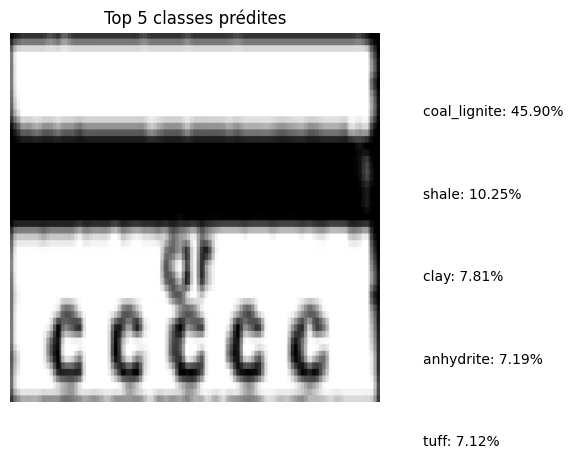

In [22]:
#prédiction du top 5 pour une image avec les probabilités
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model.h5')

# Charger une image de test et effectuer la prédiction
img = load_img('motifs_legende/supervised/test/coal_lignite/coal_lig_15-9-1.png', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

# Trouver les cinq classes les plus probables
top_preds = np.argsort(preds[0])[::-1][:5]
top_labels = [class_labels[i] for i in top_preds]
top_probs = preds[0][top_preds]


# Afficher l'image et les classes prédites avec leurs probabilités
plt.imshow(img)
plt.axis('off')
plt.title('Top 5 classes prédites')
for i in range(len(top_labels)):
    plt.text(250, 50 + i * 50, f'{top_labels[i]}: {top_probs[i]:.2%}')
plt.show()

1/1 [==============================] - 2s 2s/step


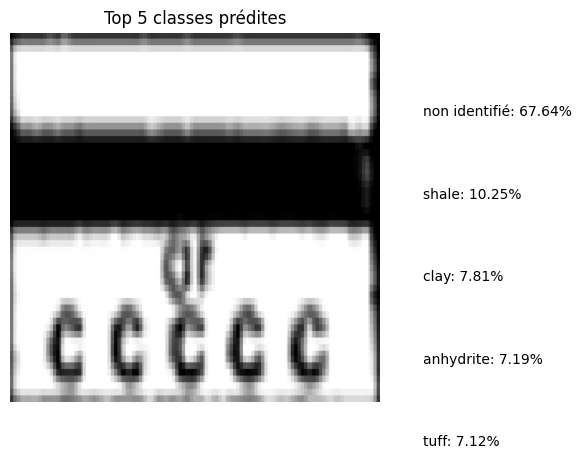

In [20]:
model = load_model('model.h5')

# Charger une image de test et effectuer la prédiction
img = load_img('motifs_legende/supervised/test/coal_lignite/coal_lig_15-9-1.png', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

#Trouver les cinq classes les plus probables
top_preds = np.argsort(preds[0])[::-1][:5]
top_labels = [class_labels[i] for i in top_preds]
top_probs = preds[0][top_preds]

# Vérifier si la probabilité de la classe numéro 1 est inférieure à 50%
if top_probs[0] < 0.5:
    # Si c'est le cas, prédire "autres" comme classe
    top_labels[0] = "non identifié"
    top_probs[0] = 1 - np.sum(top_probs[1:])  # La probabilité de la classe "autres" est le complément des autres probabilités

# Afficher l'image et les classes prédites avec leurs probabilités
plt.imshow(img)
plt.axis('off')
plt.title('Top 5 classes prédites')
for i in range(len(top_labels)):
    plt.text(250, 50 + i * 50, f'{top_labels[i]}: {top_probs[i]:.2%}')
plt.show()


In [10]:
#prédiction de plusieurs images d'une même classe
import os
import numpy as np
import glob
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model.h5')

# Charger toutes les images du dossier test
test_dir = 'motifs_legende/supervised/test/coal_lignite/'
image_files = glob.glob(os.path.join(test_dir, '*.png'))

for image_file in image_files:
    img = load_img(image_file, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)

    # Trouver la classe prédite et afficher le résultat
    class_idx = np.argmax(preds[0])
    predicted_label = class_labels[class_idx]
    print("Classe prédite :", predicted_label)



1/1 [==============================] - 1s 1s/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 162ms/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 156ms/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 135ms/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 133ms/step
Classe prédite : coal_lignite


In [14]:
#ajout de la classe "non identifié"
# Charger toutes les images du dossier test
model = load_model('model.h5')
test_dir = 'motifs_legende/supervised/test/coal_lignite/'
image_files = glob.glob(os.path.join(test_dir, '*.png'))

for image_file in image_files:
    img = load_img(image_file, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)

    # Trouver la classe prédite et la probabilité correspondante
    class_idx = np.argmax(preds[0])
    predicted_prob = preds[0][class_idx]

    # Vérifier si la probabilité de la classe prédite est inférieure à 50%
    if predicted_prob < 0.5:
        predicted_label = "non identifié"
    else:
        predicted_label = class_labels[class_idx]

    # Afficher le résultat
    print("Classe prédite :", predicted_label)


1/1 [==============================] - 1s 1s/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 136ms/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 139ms/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 123ms/step
Classe prédite : coal_lignite
1/1 [==============================] - 0s 147ms/step
Classe prédite : non identifié
